# Supervised Learning Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## **Please read the instructions carefully before starting the project.** 

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned. 

* Blanks '_______' are provided in the notebook that need to be filled with an appropriate code to get the correct result

* With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space

* Identify the task to be performed correctly and only then proceed to write the required code

* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code"

* Running incomplete code may throw an error

* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors

* Add the results/observations derived from the analysis in the presentation and submit the same in .pdf format

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [2]:
# loading the data
data = pd.read_csv('used_device_data.csv')

## Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [3]:
# viewing top 5 rows of the data
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Checking the shape of the dataset

In [4]:
# checking number of rows and columns
data.shape

(3454, 15)

### Checking the data types of the columns for the dataset

In [5]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

### Statistical summary of the dataset

In [6]:
# looking at the statistical summary of the data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


### Checking for duplicate values

In [7]:
# checking for duplicate entries in the data
data.duplicated().sum()

0

### Checking for missing values

In [8]:
# checking for missing values in the data
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [9]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis

### Univariate Analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`normalized_used_price`**

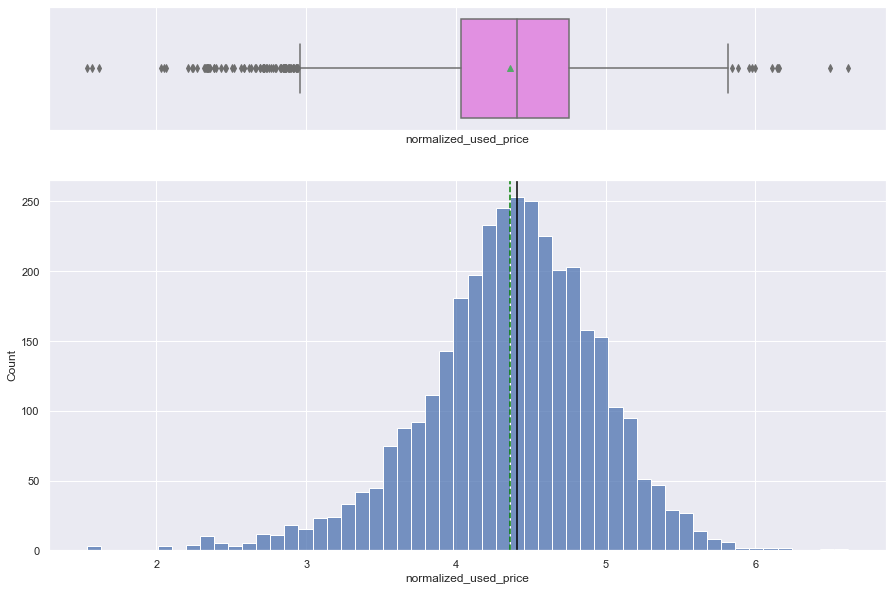

In [12]:
# code to create histogram and boxplot for 'normalized_used_price'
histogram_boxplot(df, "normalized_used_price")

### Observations

The price of used phone/tablets has been normalized to fit a normal distribution. There are high numbers of outliers of both tails of the plot. The mean and median of normalized used phone price are both around 4.4 euros.

**`normalized_new_price`**

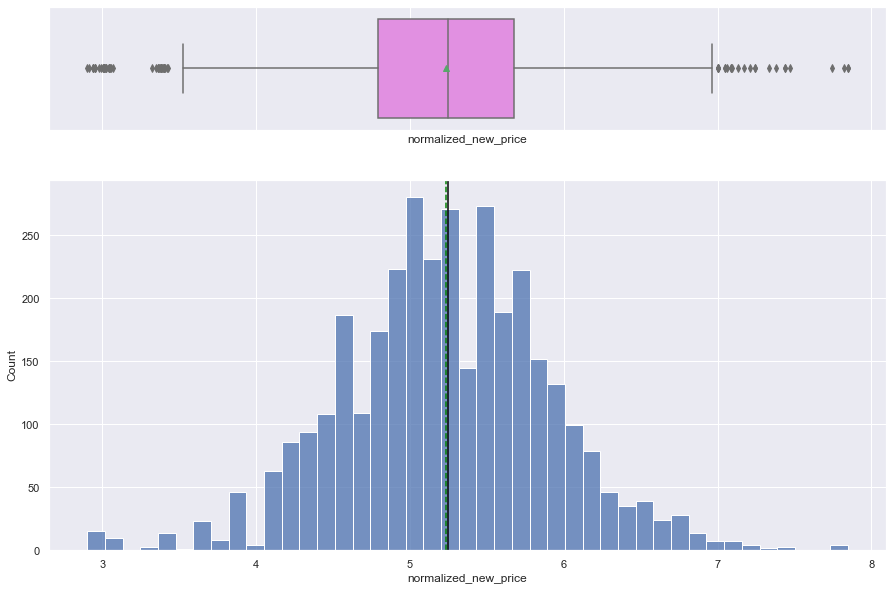

In [13]:
# code to create histogram and boxplot for 'normalized_new_price'
histogram_boxplot(df,'normalized_new_price')

### Observations

Similar to used phone price, the price of new phones/tablets has been normalized to fit a normal distribution. There are numerous outliers on both tails of the plot. The mean and median of normalized used phone price are both around 5.3 euros.

**`screen_size`**

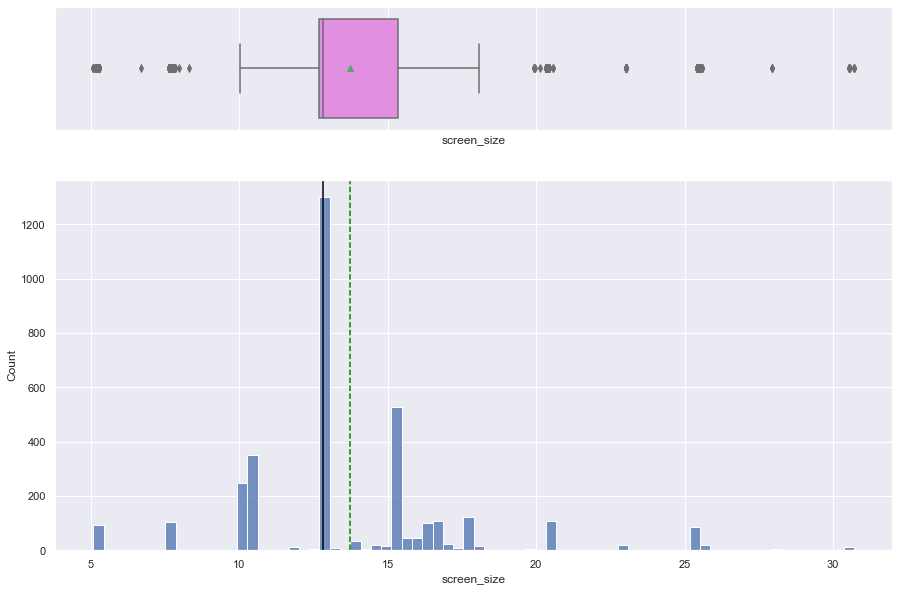

In [14]:
# histogram and boxplot for 'screen_size'
histogram_boxplot(df,'screen_size')

### Observations

This distribution is right skewed with outliers on both tails. It has a median of about 13 cm and a mean of about 14 cm.

**`main_camera_mp`**

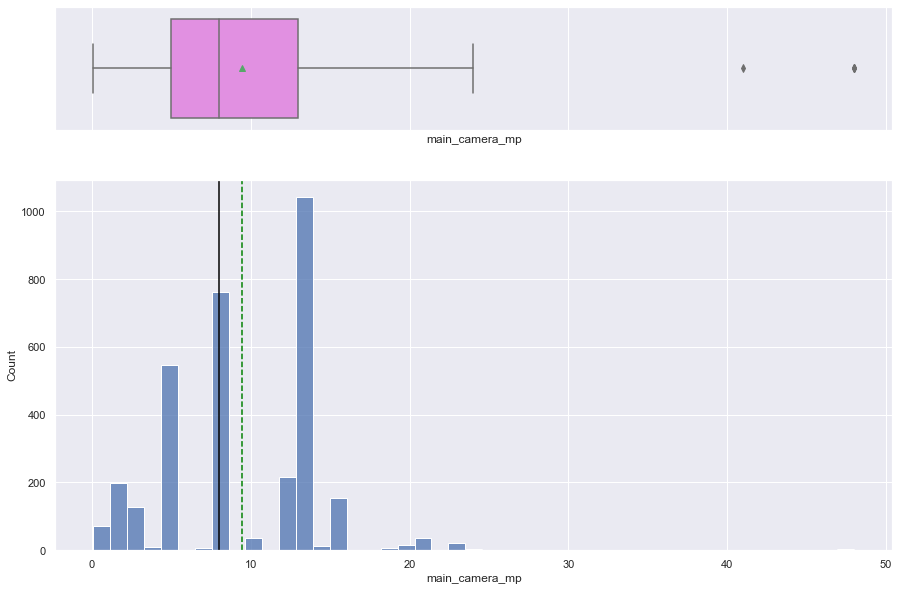

In [15]:
# histogram and boxplot for 'main_camera_mp'
histogram_boxplot(df,'main_camera_mp')

### Observations

This distribution is right skewed with few outliers on the right tail. It has a median of about 8 megapixels and a mean of about 9 megapixels.

**`selfie_camera_mp`**

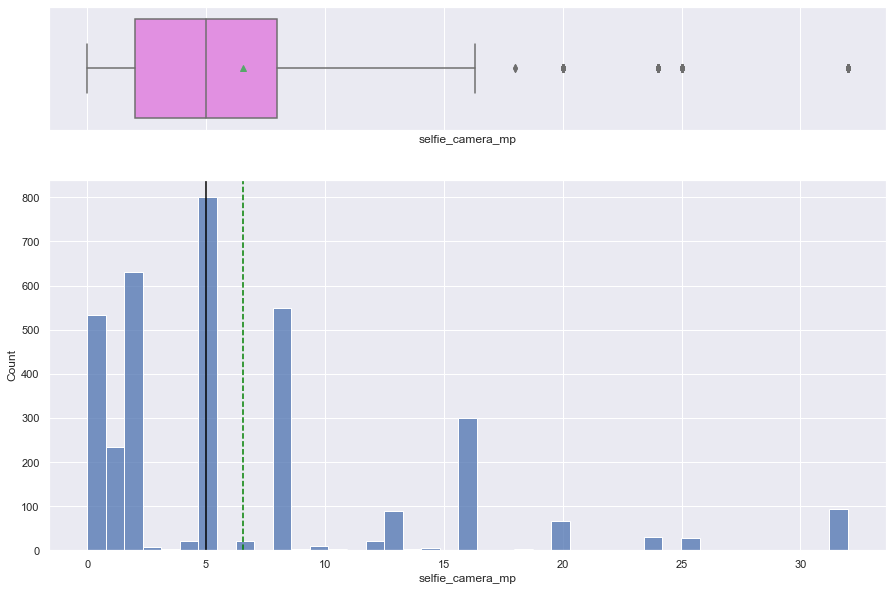

In [16]:
# histogram and boxplot for 'selfie_camera_mp'
histogram_boxplot(df,'selfie_camera_mp')

### Observations

This distribution is right skewed with some outliers on the right tail. It has a median of about 5 megapixels and a mean of about 6 megapixels.

**`int_memory`**

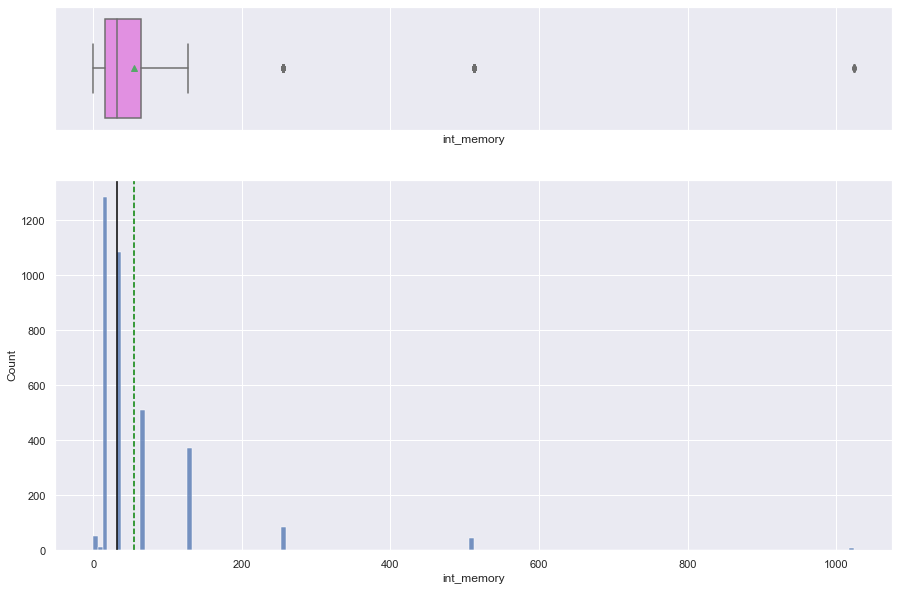

In [17]:
# histogram and boxplot for 'int_memory'
histogram_boxplot(df,'int_memory')

### Observations

This distribution is right skewed with some spaced out outliers on the right tail. The mean and median of the internal memory fall between 30-50GB.

**`ram`**

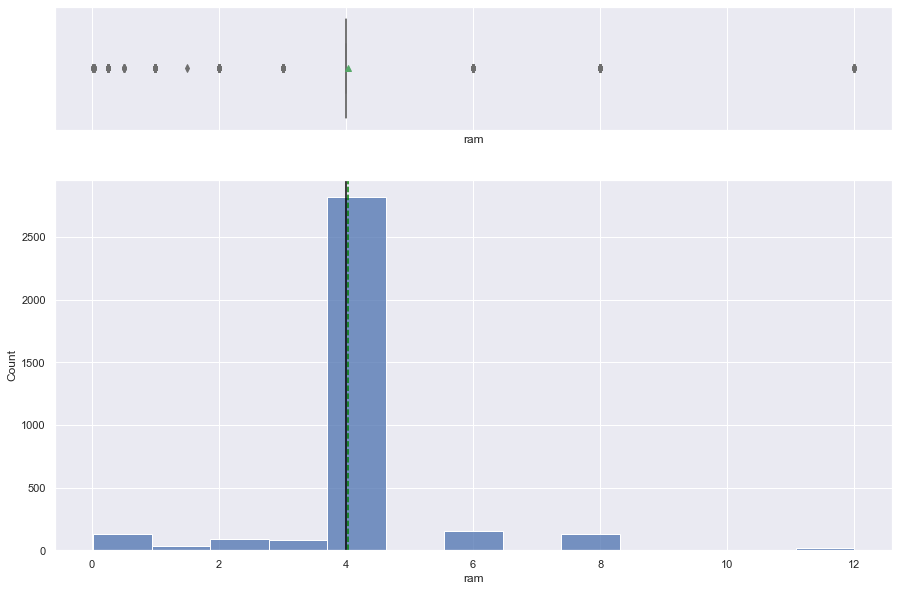

In [18]:
# histogram and boxplot for 'ram'
histogram_boxplot(df,'ram')

### Observations

The mean and median of RAM are 4GB.

**`weight`**

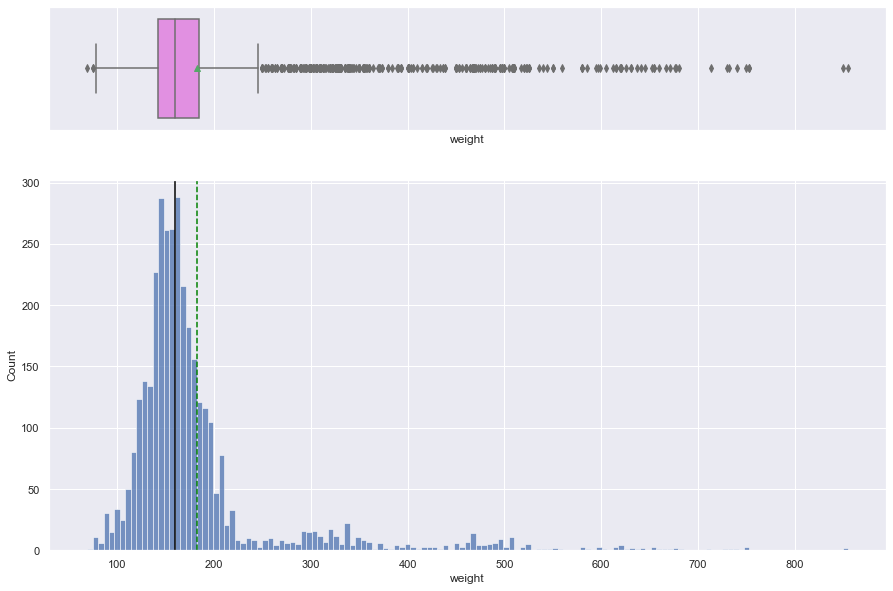

In [19]:
# histogram and boxplot for 'weight'
histogram_boxplot(df,'weight')

### Observations

This distribution is a bit right skewed with few outliers on the left tail and numerous outliers on the right tail. It has a median of about 160g and a mean of about 180g.

**`battery`**

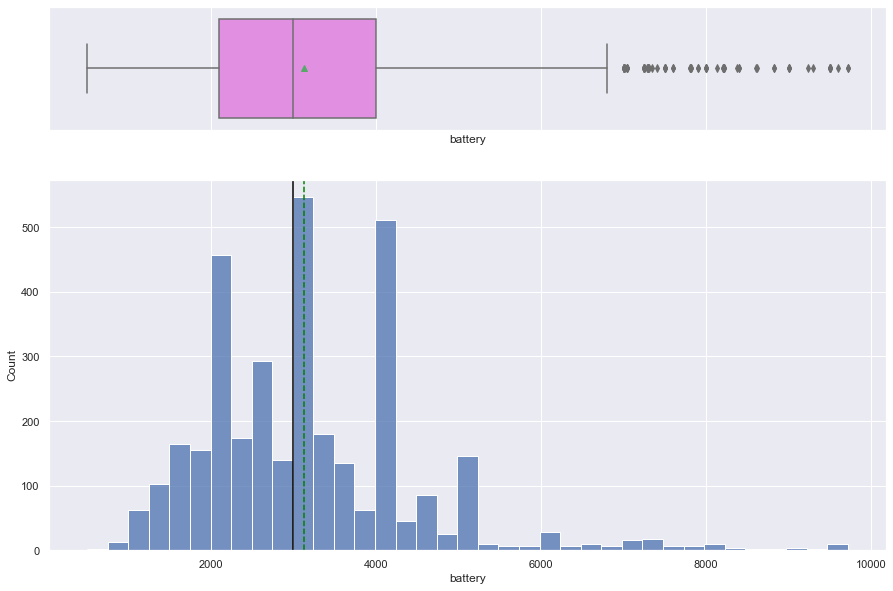

In [20]:
# histogram and boxplot for 'battery'
histogram_boxplot(df,'battery')

### Observations

This distribution is right skewed with all outliers on the right tail. It has a median of about 3,000 mAh and a mean of about 3,150 mAh.

**`days_used`**

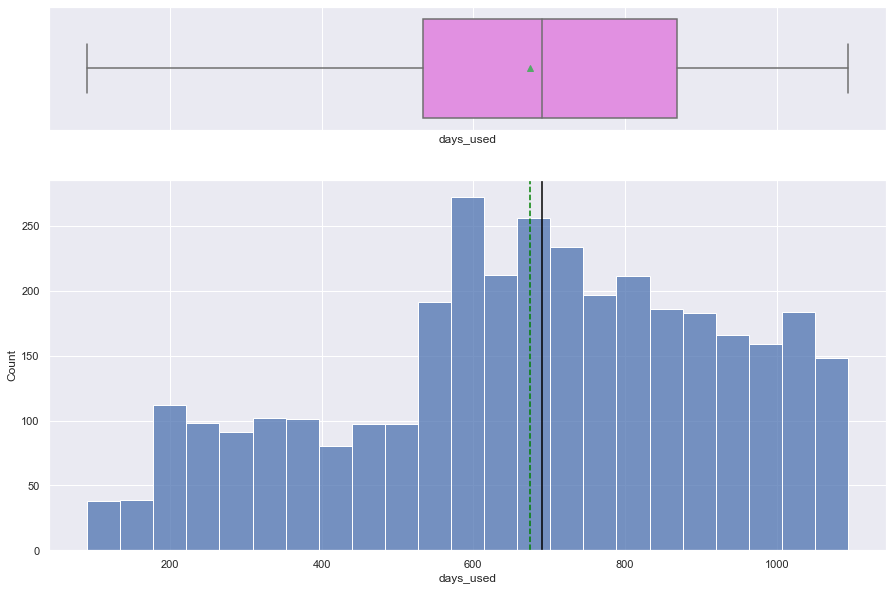

In [21]:
# histogram and boxplot for 'days_used'
histogram_boxplot(df,'days_used')

### Observations

This distribution is left skewed with no outliers. It has a mean and median ranging between 650 and 700 days.

**`brand_name`**

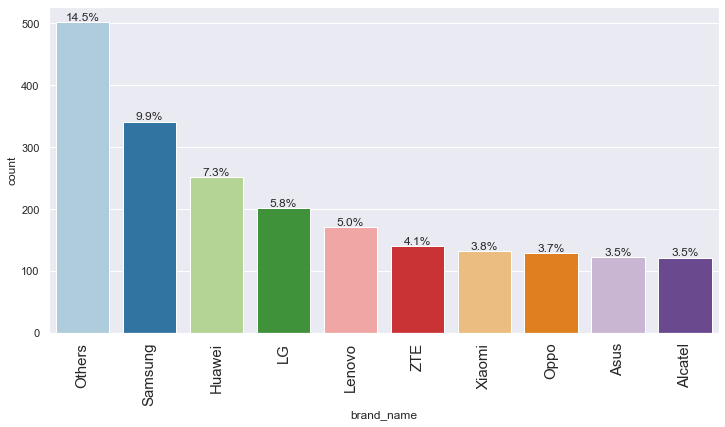

In [22]:
# code to create labeled_barplot for 'brand_name'
labeled_barplot(df, "brand_name", perc=True, n=10)

### Observations

The highest count of phones by brand name in the data are categorized under 'Others' at 14.5%, followed by Samsung at 9.9% and then Huawei at 7.3%.

**`os`**

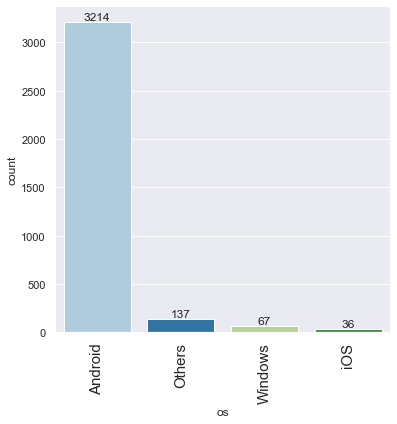

In [23]:
# code to create labeled_barplot for 'os'
labeled_barplot(df,'os')

### Observations

The highest count of phones by OS in the data are Androids at 3214, followed by 'Others' at 137, then Windows at 67 and lastly iOS at 36 phones.

**`4g`**

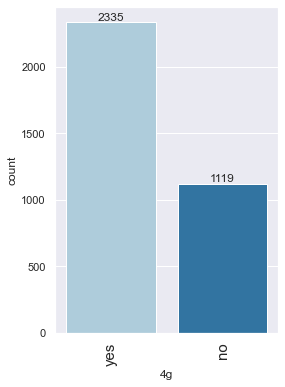

In [24]:
# code to create labeled_barplot for '4g'
labeled_barplot(df,'4g')

### Observations

2335 phones in the data have 4G capabilities while 1119 phones do not.

**`5g`**

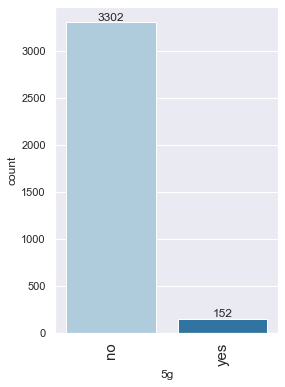

In [25]:
# code to create labeled_barplot for '5g'
labeled_barplot(df,'5g')

### Observations

152 phones in the data have 5G capabilities while 3302 phones do not.

**`release_year`**

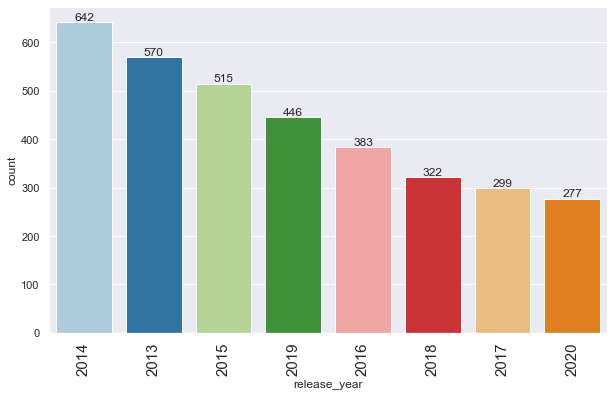

In [26]:
# code to create labeled_barplot for 'release_year'
labeled_barplot(df,'release_year')

### Observations

Most phones in the data were released between 2013-2015. 2020 is the year with the lowest count of released phones with a count of 277. 2014 is the year with the highest count of phones released with a count of 642.

### Bivariate Analysis

**Correlation Check**

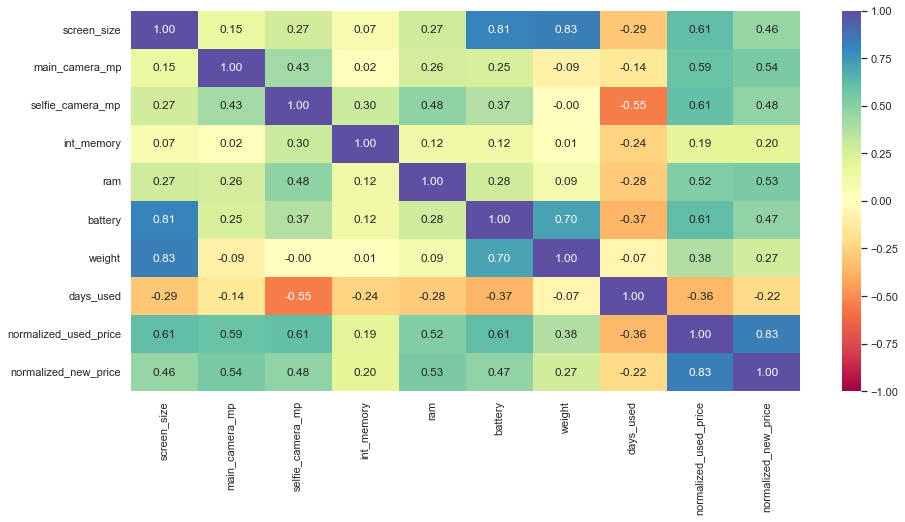

In [27]:
# code to select columns with numerical data types and create a list of those columns
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

# code to create heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### Observations

The columns with the highest correlation in the data are:
Normalized used price and normalized new price (83%), 
Screen size and weight (83%), 
Screen size and battery (81%).

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

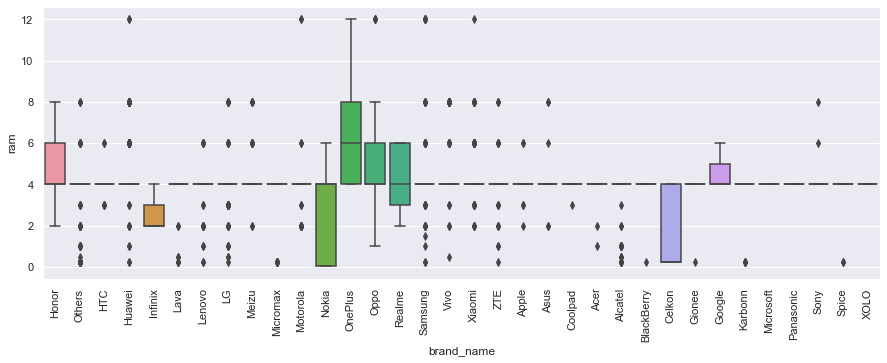

In [28]:
# code to create box plots visualizing the relationship between the "brand_name" and "ram"
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

### Observations

Most brands seem to have similar median RAM size of 4GB. The brands with the highest RAM size on their devices (including outliers) are OnePlus, Huawei, Motorola, Oppo, Samsung, Xiaomi.

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [29]:
# code to create a new dataframe containing rows where the "battery" has values greater than 4500, and then returns the shape 
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

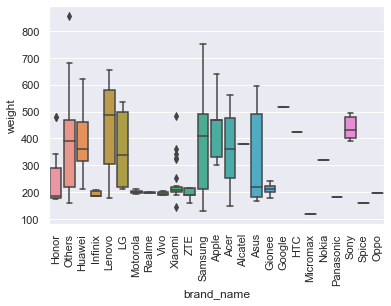

<Figure size 1080x360 with 0 Axes>

In [30]:
# code to create a boxplot for 'brand_name' and 'weight'
sns.boxplot(data=df_large_battery,x='brand_name',y='weight')
plt.xticks(rotation=90)
plt.figure(figsize=(15, 5))
plt.show()

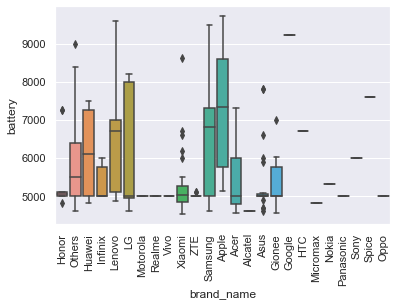

<Figure size 1080x360 with 0 Axes>

In [31]:
# code to create a boxplot for 'brand_name' and 'battery'
sns.boxplot(data=df_large_battery,x='brand_name',y='battery')
plt.xticks(rotation=90)
plt.figure(figsize=(15, 5))
plt.show()

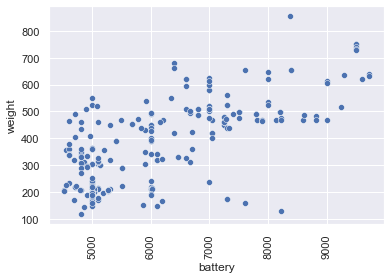

<Figure size 1080x360 with 0 Axes>

In [32]:
# code to create a scatterplot for 'battery' and 'weight'
sns.scatterplot(data=df_large_battery,x='battery',y='weight')
plt.xticks(rotation=90)
plt.figure(figsize=(15, 5))
plt.show()

### Observations
There are 341 rows and 15 columns in the new dataset created for phone batteries over 4,500 mAh.
<p>There is a high correlation between battery and weight of device. In the heatmap we created, the correlation between the two is 70%. The scatterplot for battery and weight shows a positive correlation, as size of the battery increases the weight also tends to increase.</p>
<p>Brands with phone weight over 600 grams are 'Others', Huawei, Lenovo, Samsung and Apple.</p>
<p>Brands with battery power of 9000 mAh and above are 'Others', Lenovo, Samsung, Apple and Google.</p>

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [33]:
# creating a new dataframe containing rows where "screen_size" has values greater than 6 inches converted to centimeters, and then returns the shap
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

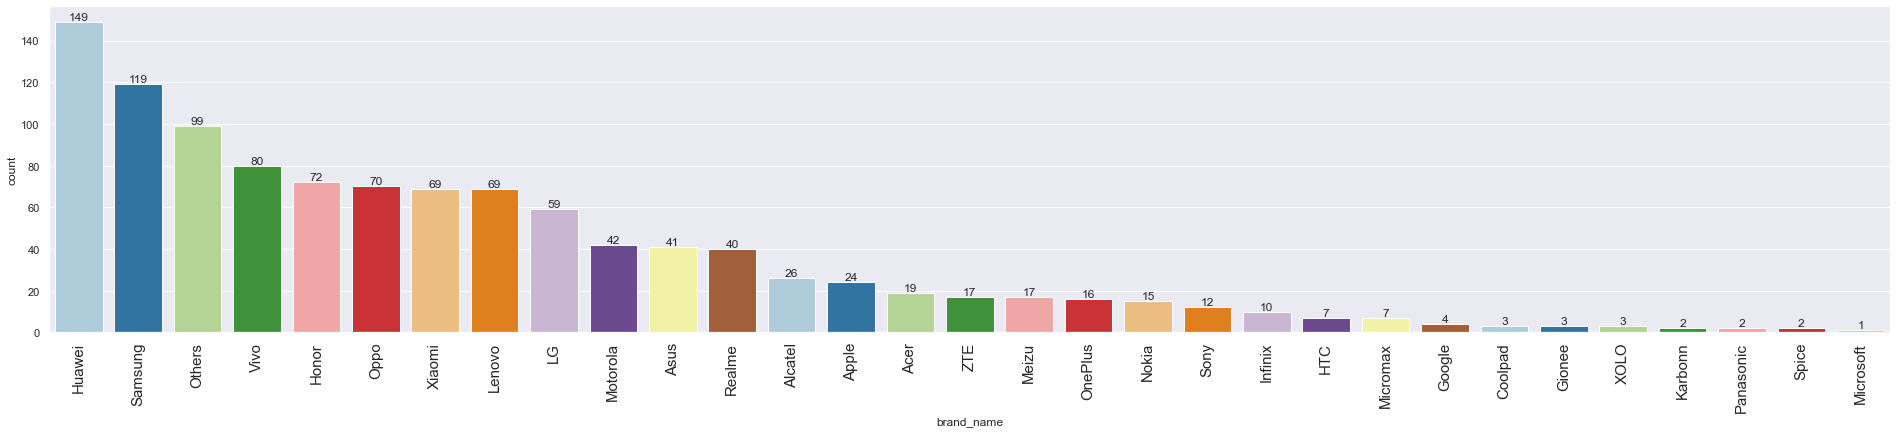

In [34]:
# code to create labeled_barplot for 'brand_name' in large screen dataframe
labeled_barplot(df_large_screen,'brand_name') 

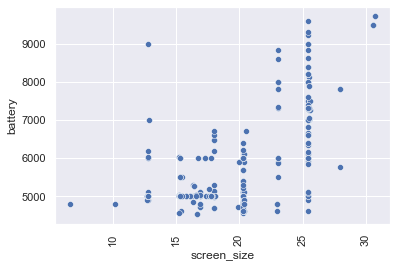

<Figure size 1080x360 with 0 Axes>

In [35]:
# code to create a scatterplot for 'battery' and 'weight'
sns.scatterplot(data=df_large_battery,x='screen_size',y='battery')
plt.xticks(rotation=90)
plt.figure(figsize=(15, 5))
plt.show()

### Observations
There are 1099 rows and 15 columns in the dataset created for phone screen sizes over 15.24cm.
<p>There are 1099 rows and 15 columns in the dataset created for phone screen sizes over 15.24cm.
In the heatmap we created, the correlation between screen size and battery was 83%, which is quite high. This means that people who enjoy larger screens for the purpose of entertainment will usually have the added benefit of more battery power. However, there are many phones with large screen sizes and less battery power. The scatterplot for battery and screen size shows that the device with the largest screen size will also have the highest battery strength.</p>
<p>The top 5 phone brands with the highest count of phones with screen sizes over 15.24cm are; Huawei (149 phones), Samsung (119 phones), 'Others' (99 phones), Vivo (80 phones) and Honor (72 phones).</p>

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [36]:
# code to create a new dataframe containing rows where "selfie_camera_mp" has values greater than 8 megapixels, and then returns the shape
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

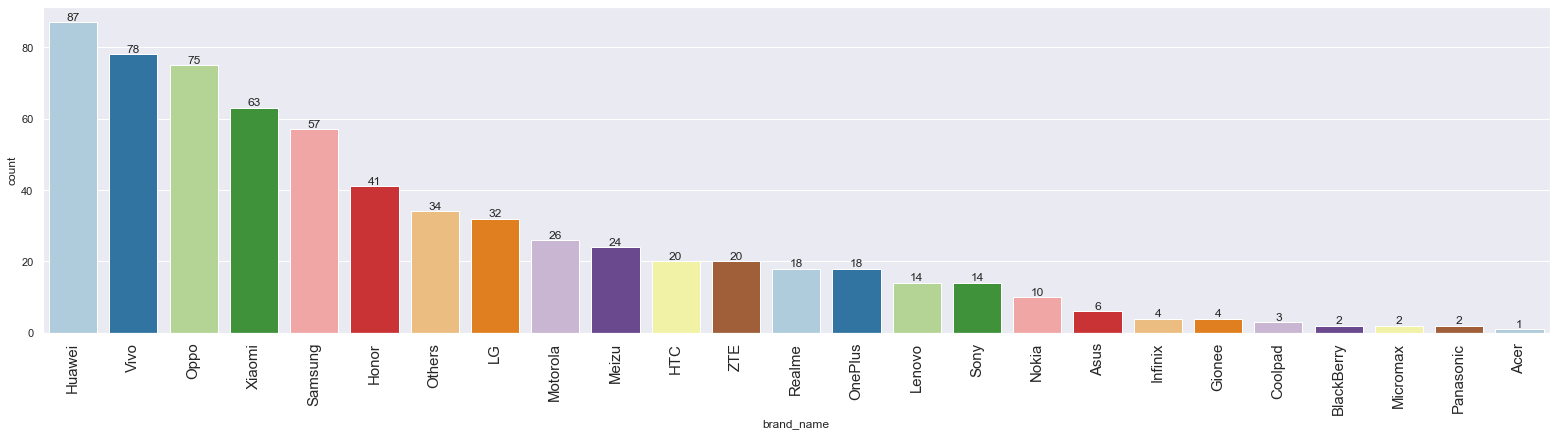

In [37]:
# code to create labeled_barplot for 'brand_name' in large selfie camera dataframe
labeled_barplot(df_selfie_camera,'brand_name') 

### Observations
There are 655 rows and 15 columns in the new dataset created for selfie camera megapixels over 8 megapixels.
<p>The top 5 phone brands with selfies camera megapixel counts over 8 are; Huawei (87 phones), Vivo (78 phones), Oppo (75 phones), Xiaomi (63 phones) and Samsung (57 phones).</p>

**We'll do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [38]:
# code to create a new dataframe containing rows where "main_camera_mp" has values greater than 16 megapixels, and then returns the shape
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

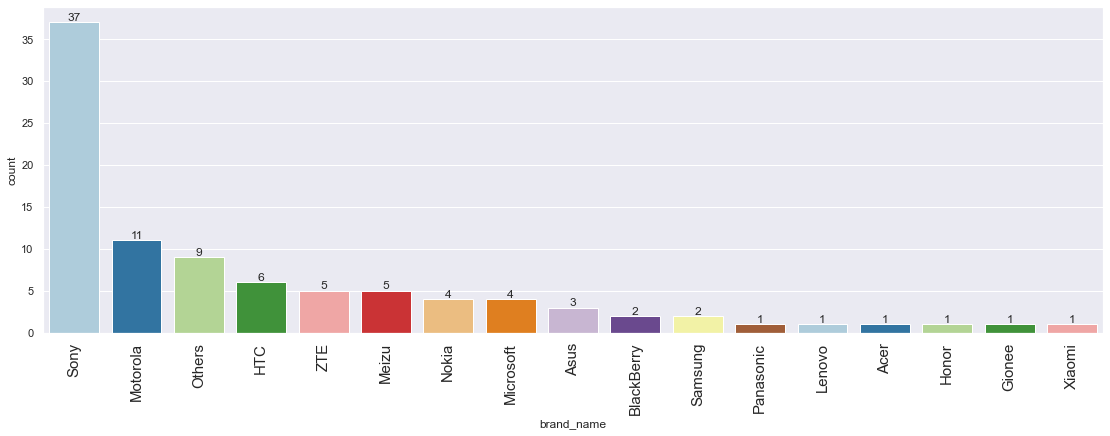

In [39]:
# code to create labeled_barplot for 'brand_name' in large main camera dataframe
labeled_barplot(df_main_camera,'brand_name') 

### Observations
There are 94 rows and 15 columns in the new dataset created for main (rear) camera megapixels over 16 megapixels.
<p>The top 5 phone brands with main camera megapixel counts over 16 are; Sony (37 phones), Motorola (11 phones), 'Others' (9 phones), HTC (6 phones) and ZTE (5 phones).</p>

**Analyzing how the price of used devices varies across the years.**

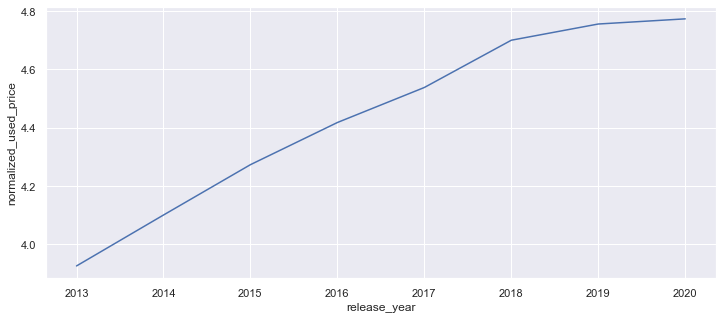

In [40]:
# code to create a lineplot for release year and used price
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='release_year', y ='normalized_used_price',ci=None)
plt.show()

### Observations
This plot shows a positive correlation between normalized used price and release year. Understandbly, as new phones are released the more expensive they are likely to be. This is likely to be the same across both new and used phones.

**Analyzing how the prices vary for used phones and tablets offering 4G and 5G networks.**

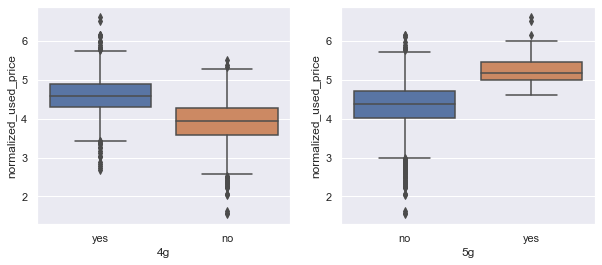

In [41]:
# creating box plots showing the relationship between "4g" and "normalized_used_price" columns, and  "5g" and "normalized_used_price" columns
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

### Observations
The plot shows that the median price of used phones tends to be higher if they have 4G and 5G capabilities than those without. The median price of a used phones with 4G capabilities is about 4.6 euros, while the median price of used phones with 5G capabilities is higher at about 5.1 euros. While the median price of a used phones <u>without</u> 4G capabilities is about 4 euros, and the median price of used phones <u>without</u> 5G capabilities is about 4.5 euros.

## Data Preprocessing

### Missing Value Imputation

- We'll impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [42]:
# creating a copy of the data
df1 = df.copy()

In [43]:
# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [44]:
# checking missing values after imputing the above columns
# code to impute missing values in cols_impute with median by grouping the data on release year and brand name 

cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year', 'brand_name'])[col].transform("median")
    )
# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- We'll impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [45]:
# checking missing values after imputing the above columns
# code to impute the missing values in cols_impute with median by grouping the data on brand name

cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    )

# checking for missing values
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [46]:
# code to display summary information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3444 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

- We'll fill the remaining missing values in the `main_camera_mp` column by the column median.

In [47]:
# code to check missing values after imputing the above columns
# code to impute the data with median

df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

# checking for missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

### Feature Engineering



- Let's create a new column `years_since_release` from the `release_year` column.
- We'll consider the year of data collection, 2021, as the baseline.
- We'll drop the `release_year` column.

In [49]:
# code to calculate "years_since_release" by subtracting the "release_year" column from 2021
df1["years_since_release"] = 2021 - df1["release_year"]
# removes the "release_year" column from the 'df1' dataframe 
df1.drop("release_year", axis=1, inplace=True)
# code to show descriptive statistics for the "years_since_release"
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

### Observations
We created a column for 'years since release', which shows the length of time (in years) since the original release date of the phones in the dataset. We found that the average number of years since release is 5 years. The median value is 5.5 years with a standard deviation of 2.3 years. The minimum number of years since release is 1 year and the maximum is 8 years.

### Outlier Check



- Checking for outliers in the data.

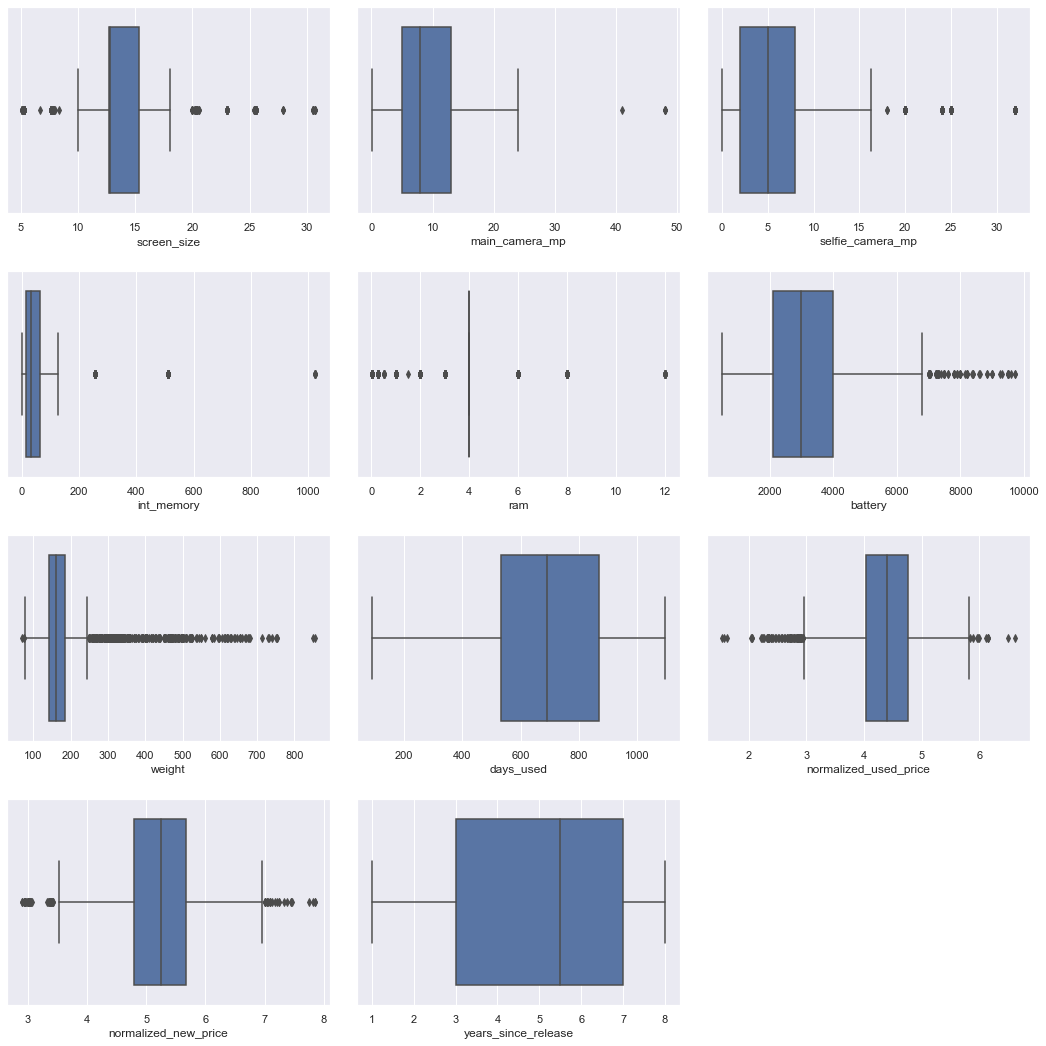

In [50]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Observations
All columns with the exception of days used and years since release have outliers. Weight appears to have the densest and highest number of outliers, while internal memory (ROM) and main camera mp appear to have the least number of outliers in the dataset.
It is likely not safe to treat these outliers as they seem to hold a lot of information that would otherwise be lost if we were to eliminate them.

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We'll build a Linear Regression model using the train data and then check it's performance

In [51]:
# code to define the dependent and independent variables
x = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(x.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [52]:
# code to add the intercept to data
x = sm.add_constant(x)

In [53]:
# code to create dummy variables for independent features
x = pd.get_dummies(
    x,
    columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

x.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [54]:
# code to split the data into train and test in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=1
)

In [55]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [56]:
# code to fit OLS model

olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                           20:09:30   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We'll be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We'll define a function to calculate MAPE and adjusted $R^2$.    
* We'll create a function which will print out all the above metrics in one go.

In [57]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [58]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [59]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


### Observations
The training 𝑅-squared is 84.4%, indicating that the model explains 84% of the variation in the train data. The training and test model are comparable so there is no underfitting. MAE and RMSE on the train and test sets are also comparable, which shows that the model is not overfitting. MAE indicates that our current model is able to predict used price of phones within a mean error of 0.18 euros on the test data. MAPE on the test data suggests we can predict within 4.5% of the used price.

## Checking Linear Regression Assumptions

We'll check the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY



- We'll test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

We'll define a function to check VIF.

In [60]:
# defining a function to check VIF.def checking_vif(predictors):
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [61]:
# code to check VIF on train data
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


### Removing Multicollinearity (if needed)



To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

We'll define a function that will help us do this.

In [62]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [63]:
# code to specify the columns with high VIF
col_list = ['screen_size','weight','brand_name_Apple','brand_name_Huawei','brand_name_Others','brand_name_Samsung','os_iOS']
# code to check the effect on model performance after dropping specified columns from train data
res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.841809,0.232201
1,brand_name_Huawei,0.841808,0.232201
2,brand_name_Others,0.841806,0.232203
3,os_iOS,0.841795,0.232211
4,brand_name_Samsung,0.841774,0.232227
5,screen_size,0.838381,0.234703
6,weight,0.838071,0.234928


In [64]:
# code to specify the column to drop
col_to_drop = 'brand_name_Apple'

# code to specify the train data from which to drop the column specified
# code to specify the test data from which to drop the column specified
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# checking VIF after changes
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,227.303871
1,screen_size,7.643583
2,main_camera_mp,2.284429
3,selfie_camera_mp,2.791121
4,int_memory,1.364138
5,ram,2.273686
6,battery,4.079720
7,weight,6.394014
8,days_used,2.659799
9,normalized_new_price,3.102417


### Observation
Some variables show moderate to high multicollinearity (7 initially identified with VIF scores above 5) so we proceeded to drop values one after the other using a loop until our p-values for all variables were below 0.05.

### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [65]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [66]:
# code to specify the train data from which to select the specified columns
# code to specify the test data from which to select the specified columns
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [67]:
# fitting OLS() on updated dataset (no multicollinearity and no insignificant predictors)

olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     988.1
Date:                   Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                           20:10:10   Log-Likelihood:                 104.71
No. Observations:                   2417   AIC:                            -181.4
Df Residuals:                       2403   BIC:                            -100.4
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [68]:
# checking model performance on train set (seen 70% data)
# code to check performance on train data
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [69]:
# checking model performance on test set (seen 30% data)
# code to check performance on test data
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE



- We'll test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [70]:
# creating a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.855243,0.232245
1525,4.448399,4.628813,-0.180413
1128,4.315353,4.280778,0.034574
3003,4.282068,4.206270,0.075798
2907,4.456438,4.470315,-0.013877


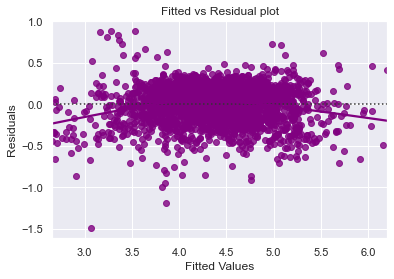

In [71]:
# plotting the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### Observation
No visible patterns were found in this test, we concluded that our model is linear and independent. Hence, the assumption of linearity and independence in the data is satisfied.

### TEST FOR NORMALITY

- We'll test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

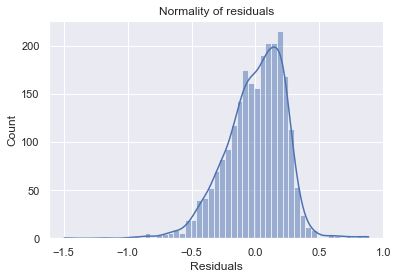

In [72]:
# code to plot the distribution of residuals
sns.histplot(data=df_pred,x="Residuals",kde=True)
plt.title("Normality of residuals")
plt.show()

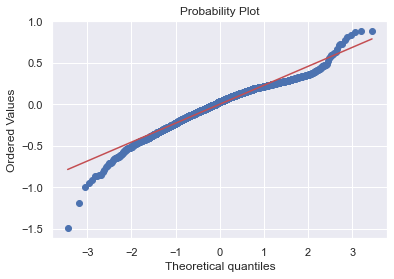

In [73]:
# importing the necessary libraries
import pylab
import scipy.stats as stats
# code to generate a probability plot (quantile-quantile plot) for the residuals
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [74]:
# code to perform the Shapiro-Wilk test on the residuals to assess their normality
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9690961837768555, pvalue=2.130726936518395e-22)

### Observation
The Shapiro-Wilk test proves the p-value of 2.13 to be greater than 0.05. The plotted distribution is also relatively close to being normal. As a result, we will conclude that the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY



- We'll test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [75]:
# importing the necessary libraries
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# code to compute the Goldfeld-Quandt test on the residuals and return the F statistic and p-value
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0438035947010254), ('p-value', 0.22944475832467995)]

### Observation
Our p-value is 0.229. Since p-value > 0.05, we concluded that the residuals are homoscedastic and that the assumption is satisfied.

## Final Model Summary

In [76]:
# fitting the final model
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     988.1
Date:                   Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                           20:10:32   Log-Likelihood:                 104.71
No. Observations:                   2417   AIC:                            -181.4
Df Residuals:                       2403   BIC:                            -100.4
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [77]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231712,0.181763,0.842409,0.841491,4.359962


In [78]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231712,0.181763,0.842409,0.841491,4.359962


### Observation
The training 𝑅2 is still 84%, indicating that the model explains 84% of the variation in the trained data. MAE indicates that our final model is able to predict used price of phones within a mean error of 0.18 euros on the test data. MAPE on the test data suggests we can predict within 4.35% of the used price of phones/tablets.

The training and testing data returned the exact same values in the performance check. These values have minor visible changes from the initial model performance check. No overfitting or underfitting is seen in our final model. Since all assumptions are fulfilled, we have concluded that we are satisfied with our final linear regression model.

##  Actionable Insights and Recommendations

### Insights

1. Most phone brands appear to have a similar median RAM size of 4GB. The brands with the highest RAM size (including outliers) are OnePlus, Huawei, Motorola, Oppo, Samsung, Xiaomi.

2. As the power of a phone battery increases the weight also tends to increase. Brands with battery power of 9000 mAh and above are 'Others', Lenovo, Samsung, Apple and Google.

3. The top 5 brands with selfie camera megapixel counts over 8 are; Huawei (87 phones), Vivo (78 phones), Oppo (75 phones), Xiaomi (63 phones) and Samsung (57 phones).

4. The top 5 brands with rear camera megapixel counts over 16 are; Sony (37 phones), Motorola (11 phones), 'Others' (9 phones), HTC (6 phones) and ZTE (5 phones)

5. The more recent the release of a phone, the more expensive it is likely to be. This is the same across both new and used phones.

6. Based on high correlations between screen size and battery, people who enjoy larger screens for the purpose of entertainment will usually have the added benefit of more battery power. The phone with the largest screen size also has the highest mAh

7. The median price of used phones/tablets tend to be higher if they have 4G and 5G capabilities than those without. Used phones with 5G capabilities tend to have a higher median price than those with 4G capabilities.

8. Top attributes identified in the data with the highest degree of correlation are; Normalized used price and normalized new price (83%), Screen size and weight (83%), Screen size and battery (81%), Weight and battery (70%).

### Recommendation

1. This is useful for customers to know. ReCell can create more awareness on its homepage by highlighting phones from the listed brands that have large RAM and educating customers about what that means for them.

2. The listed brands should be advertised to people who typically need longer lasting batteries on their devices, like; frequent travelers.

3. Mobile devices from these brands should be compared with other features they offer and then selected for marketing to people who take lots of selfies .eg. Content creators, Influencers, Gen Z’s, Millennials.etc.

4. Mobile devices from the listed brands should be compared with other features they offer and then selected for marketing to people who usually take lots of high quality pictures .eg. Content creators, photographers.etc.

5. Newly released phones/tablets should also be marketed more frequently as they sell at higher prices. ReCell can also build budget calculators and other customer friendly tools onto its website to help customers find newest releases and deals within their budget, based on their preferences.

6. There are also many phones with large screen sizes and lesser battery strength so people who are looking to buy phones mainly for entertainment should be recommended phones with longer lasting batteries on the ReCell platform.

7. Devices with 5g capabilities sell at a higher price and should be pushed more in marketing, to emphasize the benefits of newer features.

8. As these attributes are generally top concerns for customers. I recommend creating preset categories or sophisticated selection tools that will help customers make the best choices based on factors most important to them. This will reduce incidents of returns and negative experiences.

9. We will need demographic, geographic and psychographic data as there are more factors that can affect the choices ReCell customers will make. We will be able to create models that make predictions that will drive up demand and sales.

---------